In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install nltk

In [4]:
!pip install wordcloud

In [5]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
# Unduh data NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
# load file
df = pd.read_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/CleanedJago.csv')

In [8]:
# Case folding pada kolom teks (seluruh data)
df['content_casefolding'] = df['content'].str.lower()
df

,content,content_casefolding
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut...."
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp"
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken..."
4,good,good
...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern..."
4353,Pembuatan mudah,pembuatan mudah
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...


In [9]:
# Menghapus tanda baca dari kolom teks
df['content_remove_punct'] = df['content_casefolding'].str.translate(str.maketrans('', '', string.punctuation))
df
#print("Contoh data setelah remove punctuation :")
#df['Tweet'].loc[0]

,content,content_casefolding,content_remove_punct
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut....",kebanyakan eror sekarang jadi takut
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp",bank jago emang jagoan mantappp
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken...",penyelesaian masalah kurang profesional rekeni...
4,good,good,good
...,...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern...",keren lah bank jago pelayanan terbaik yg perna...
4353,Pembuatan mudah,pembuatan mudah,pembuatan mudah
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...


In [10]:
# Tokenisasi menggunakan split standar
df['content_tokens'] = df['content_remove_punct'].apply(lambda x: x.split() if isinstance(x, str) else [])
df

,content,content_casefolding,content_remove_punct,content_tokens
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut....",kebanyakan eror sekarang jadi takut,"[kebanyakan, eror, sekarang, jadi, takut]"
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,"[jago, yg, betul, kau, kenapa, udah, login, ma..."
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp",bank jago emang jagoan mantappp,"[bank, jago, emang, jagoan, mantappp]"
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken...",penyelesaian masalah kurang profesional rekeni...,"[penyelesaian, masalah, kurang, profesional, r..."
4,good,good,good,[good]
...,...,...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern...",keren lah bank jago pelayanan terbaik yg perna...,"[keren, lah, bank, jago, pelayanan, terbaik, y..."
4353,Pembuatan mudah,pembuatan mudah,pembuatan mudah,"[pembuatan, mudah]"
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,"[saya, download, aplikasi, ini, karena, ingin,..."
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,"[sangat, membantu, dn, lebih, mudah, di, gunak..."


In [11]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.3 MB/s eta 0:00:00


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
# Melakukan stemming pada kolom tokens
df['content_stemming'] = df['content_tokens'].apply(lambda words: [stemmer.stem(word) for word in words])
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut....",kebanyakan eror sekarang jadi takut,"[kebanyakan, eror, sekarang, jadi, takut]","[banyak, eror, sekarang, jadi, takut]"
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,"[jago, yg, betul, kau, kenapa, udah, login, ma...","[jago, yg, betul, kau, kenapa, udah, login, ma..."
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp",bank jago emang jagoan mantappp,"[bank, jago, emang, jagoan, mantappp]","[bank, jago, emang, jago, mantappp]"
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken...",penyelesaian masalah kurang profesional rekeni...,"[penyelesaian, masalah, kurang, profesional, r...","[selesai, masalah, kurang, profesional, rekeni..."
4,good,good,good,[good],[good]
...,...,...,...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern...",keren lah bank jago pelayanan terbaik yg perna...,"[keren, lah, bank, jago, pelayanan, terbaik, y...","[keren, lah, bank, jago, layan, baik, yg, pern..."
4353,Pembuatan mudah,pembuatan mudah,pembuatan mudah,"[pembuatan, mudah]","[buat, mudah]"
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,"[saya, download, aplikasi, ini, karena, ingin,...","[saya, download, aplikasi, ini, karena, ingin,..."
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,"[sangat, membantu, dn, lebih, mudah, di, gunak...","[sangat, bantu, dn, lebih, mudah, di, guna, ba..."


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi'] = df['content_stemming'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut....",kebanyakan eror sekarang jadi takut,"[kebanyakan, eror, sekarang, jadi, takut]","[banyak, eror, sekarang, jadi, takut]",banyak eror sekarang jadi takut
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,"[jago, yg, betul, kau, kenapa, udah, login, ma...","[jago, yg, betul, kau, kenapa, udah, login, ma...",jago yg betul kau kenapa udah login masa bisa ...
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp",bank jago emang jagoan mantappp,"[bank, jago, emang, jagoan, mantappp]","[bank, jago, emang, jago, mantappp]",bank jago emang jago mantappp
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken...",penyelesaian masalah kurang profesional rekeni...,"[penyelesaian, masalah, kurang, profesional, r...","[selesai, masalah, kurang, profesional, rekeni...",selesai masalah kurang profesional rekening am...
4,good,good,good,[good],[good],good
...,...,...,...,...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern...",keren lah bank jago pelayanan terbaik yg perna...,"[keren, lah, bank, jago, pelayanan, terbaik, y...","[keren, lah, bank, jago, layan, baik, yg, pern...",keren lah bank jago layan baik yg pernah saya ...
4353,Pembuatan mudah,pembuatan mudah,pembuatan mudah,"[pembuatan, mudah]","[buat, mudah]",buat mudah
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,"[saya, download, aplikasi, ini, karena, ingin,...","[saya, download, aplikasi, ini, karena, ingin,...",saya download aplikasi ini karena ingin top up...
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,"[sangat, membantu, dn, lebih, mudah, di, gunak...","[sangat, bantu, dn, lebih, mudah, di, guna, ba...",sangat bantu dn lebih mudah di guna banyak fit...


In [16]:
data = pd.read_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/CleanedBluBCA.csv')
text_column = df['content_normalisasi'].dropna().str.cat(sep=' ')

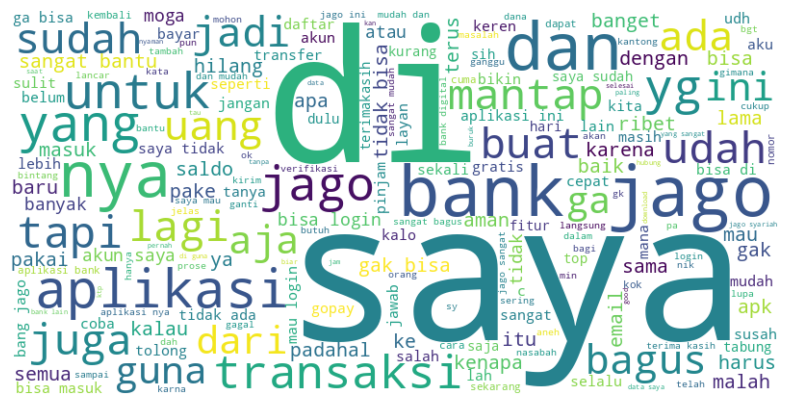

In [17]:
#wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_column)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Mendapatkan frekuensi kata dari word cloud
word_freq = wordcloud.words_

# Mengurutkan frekuensi kata secara menurun
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Membuat array dari kata-kata yang sering muncul
top_words = [word for word, freq in sorted_word_freq]

# Menampilkan array kata-kata yang sering muncul
print(top_words)

['saya', 'di', 'bank jago', 'dan', 'nya', 'aplikasi', 'yang', 'untuk', 'yg', 'jago', 'transaksi', 'tapi', 'udah', 'juga', 'mantap', 'sudah', 'lagi', 'buat', 'uang', 'ada', 'jadi', 'bagus', 'aja', 'ini', 'dari', 'guna', 'ga', 'sangat bantu', 'lama', 'gak', 'pakai', 'mau', 'saldo', 'baik', 'tidak bisa', 'ya', 'ribet', 'banget', 'pake', 'dengan', 'baru', 'email', 'sama', 'gak bisa', 'padahal', 'ke', 'karena', 'terus', 'apk', 'masuk', 'semua', 'hilang', 'malah', 'itu', 'harus', 'apa', 'kalau', 'kenapa', 'bisa', 'aman', 'bisa login', 'moga', 'atau', 'banyak', 'tidak', 'akun saya', 'aplikasi ini', 'daftar', 'kalo', 'tolong', 'jangan', 'mudah', 'saya tidak', 'akun', 'susah', 'tanya', 'kita', 'coba', 'keren', 'tidak ada', 'ga bisa', 'bikin', 'layan', 'udh', 'lain', 'bayar', 'transfer', 'bisa di', 'mau login', 'mana', 'masih', 'selalu', 'lebih', 'sangat', 'cepat', 'aku', 'jawab', 'seperti', 'sekali', 'salah', 'lah', 'c', 'sulit', 'bang jago', 'gopay', 'gratis', 'bisa masuk', 'pinjam', 'belum', 

In [19]:
# Daftar kata stopword tambahan
additional_stopwords = ['blubaca', 'blu', 'blu bca', 'bca']
# Ambil daftar stopwords bahasa Indonesia dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Tambahkan kata-kata stopword tambahan ke dalam set stop_words
stop_words.update(additional_stopwords)

# Lakukan stopword removal pada kolom 'Tweet_tokens' dan simpan hasilnya pada kolom 'Tweet_stopword'
df['content_stopword'] = df['content_tokens'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

# Tampilkan DataFrame yang sudah diperbarui
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut....",kebanyakan eror sekarang jadi takut,"[kebanyakan, eror, sekarang, jadi, takut]","[banyak, eror, sekarang, jadi, takut]",banyak eror sekarang jadi takut,"[kebanyakan, eror, takut]"
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,"[jago, yg, betul, kau, kenapa, udah, login, ma...","[jago, yg, betul, kau, kenapa, udah, login, ma...",jago yg betul kau kenapa udah login masa bisa ...,"[jago, yg, kau, udah, login, masaan, udah, bol..."
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp",bank jago emang jagoan mantappp,"[bank, jago, emang, jagoan, mantappp]","[bank, jago, emang, jago, mantappp]",bank jago emang jago mantappp,"[bank, jago, emang, jagoan, mantappp]"
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken...",penyelesaian masalah kurang profesional rekeni...,"[penyelesaian, masalah, kurang, profesional, r...","[selesai, masalah, kurang, profesional, rekeni...",selesai masalah kurang profesional rekening am...,"[penyelesaian, profesional, rekening, diambil,..."
4,good,good,good,[good],[good],good,[good]
...,...,...,...,...,...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern...",keren lah bank jago pelayanan terbaik yg perna...,"[keren, lah, bank, jago, pelayanan, terbaik, y...","[keren, lah, bank, jago, layan, baik, yg, pern...",keren lah bank jago layan baik yg pernah saya ...,"[keren, bank, jago, pelayanan, terbaik, yg, ra..."
4353,Pembuatan mudah,pembuatan mudah,pembuatan mudah,"[pembuatan, mudah]","[buat, mudah]",buat mudah,"[pembuatan, mudah]"
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,"[saya, download, aplikasi, ini, karena, ingin,...","[saya, download, aplikasi, ini, karena, ingin,...",saya download aplikasi ini karena ingin top up...,"[download, aplikasi, top, up, bibit, terhalang..."
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,"[sangat, membantu, dn, lebih, mudah, di, gunak...","[sangat, bantu, dn, lebih, mudah, di, guna, ba...",sangat bantu dn lebih mudah di guna banyak fit...,"[membantu, dn, mudah, fitur, mudah]"


In [20]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi2'] = df['content_stopword'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword,content_normalisasi2
0,"Kebanyakan eror sekarang, jadi takut....","kebanyakan eror sekarang, jadi takut....",kebanyakan eror sekarang jadi takut,"[kebanyakan, eror, sekarang, jadi, takut]","[banyak, eror, sekarang, jadi, takut]",banyak eror sekarang jadi takut,"[kebanyakan, eror, takut]",kebanyakan eror takut
1,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,jago yg betul kau kenapa udah login masaan bis...,"[jago, yg, betul, kau, kenapa, udah, login, ma...","[jago, yg, betul, kau, kenapa, udah, login, ma...",jago yg betul kau kenapa udah login masa bisa ...,"[jago, yg, kau, udah, login, masaan, udah, bol...",jago yg kau udah login masaan udah bolak ngela...
2,"Bank jago emang jagoan,, mantappp","bank jago emang jagoan,, mantappp",bank jago emang jagoan mantappp,"[bank, jago, emang, jagoan, mantappp]","[bank, jago, emang, jago, mantappp]",bank jago emang jago mantappp,"[bank, jago, emang, jagoan, mantappp]",bank jago emang jagoan mantappp
3,"Penyelesaian masalah kurang profesional, reken...","penyelesaian masalah kurang profesional, reken...",penyelesaian masalah kurang profesional rekeni...,"[penyelesaian, masalah, kurang, profesional, r...","[selesai, masalah, kurang, profesional, rekeni...",selesai masalah kurang profesional rekening am...,"[penyelesaian, profesional, rekening, diambil,...",penyelesaian profesional rekening diambil alih...
4,good,good,good,[good],[good],good,[good],good
...,...,...,...,...,...,...,...,...
4352,"Keren lah Bank jago, pelayanan terbaik yg pern...","keren lah bank jago, pelayanan terbaik yg pern...",keren lah bank jago pelayanan terbaik yg perna...,"[keren, lah, bank, jago, pelayanan, terbaik, y...","[keren, lah, bank, jago, layan, baik, yg, pern...",keren lah bank jago layan baik yg pernah saya ...,"[keren, bank, jago, pelayanan, terbaik, yg, ra...",keren bank jago pelayanan terbaik yg rasakan u...
4353,Pembuatan mudah,pembuatan mudah,pembuatan mudah,"[pembuatan, mudah]","[buat, mudah]",buat mudah,"[pembuatan, mudah]",pembuatan mudah
4354,Saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,saya download aplikasi ini karena ingin top up...,"[saya, download, aplikasi, ini, karena, ingin,...","[saya, download, aplikasi, ini, karena, ingin,...",saya download aplikasi ini karena ingin top up...,"[download, aplikasi, top, up, bibit, terhalang...",download aplikasi top up bibit terhalang nomor...
4355,Sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,sangat membantu dn lebih mudah di gunakan bany...,"[sangat, membantu, dn, lebih, mudah, di, gunak...","[sangat, bantu, dn, lebih, mudah, di, guna, ba...",sangat bantu dn lebih mudah di guna banyak fit...,"[membantu, dn, mudah, fitur, mudah]",membantu dn mudah fitur mudah


In [21]:
df.drop(df.columns[[0,1,2,3,4,5,6]], axis = 1, inplace = True)
df.head()

,content_normalisasi2
0,kebanyakan eror takut
1,jago yg kau udah login masaan udah bolak ngela...
2,bank jago emang jagoan mantappp
3,penyelesaian profesional rekening diambil alih...
4,good


In [23]:
# Menyimpan data yang telah dibersihkan
df.to_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/ProsessedJago.csv', index=False)